# Logistic Regression

Logistic Regression is based on sigmoid function

### Import necessary libraries 

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [39]:
df = pd.read_csv("datasets/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [40]:
df.Purchased.value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [41]:
df = df.drop(columns=['User ID'])

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


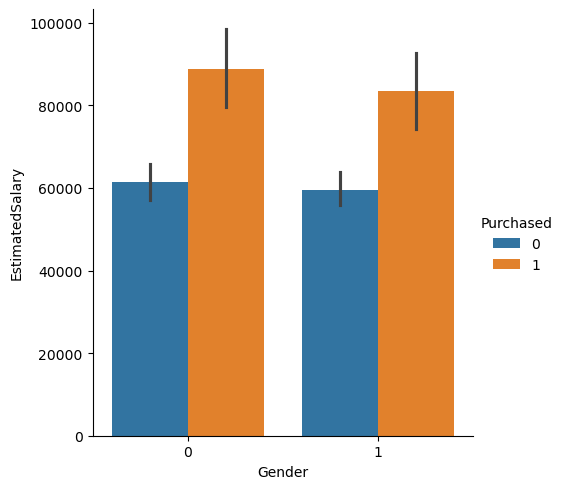

In [60]:
sns.catplot(x="Gender", y="EstimatedSalary", 
            hue="Purchased", kind="bar", data=df)

In [43]:
x = df.drop(columns=['Purchased'])
y = df.Purchased

In [44]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
x = pd.DataFrame(scale.fit_transform(x),columns=x.columns)
x.head()

,Gender,Age,EstimatedSalary
0,1.0,0.023810,0.029630
1,1.0,0.404762,0.037037
2,0.0,0.190476,0.207407
3,0.0,0.214286,0.311111
4,1.0,0.023810,0.451852


In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2,random_state= 0)

In [46]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [47]:
y_pred = lr.predict(x_test)

In [48]:
lr.predict([[1,35,75000]])

array([1])

# Evaluation

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.925

# Confusion Matrix

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[58,  0],
       [ 6, 16]])

In [51]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Purchased,,
0,58,0
1,6,16


# Classification Report

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        58
           1       1.00      0.73      0.84        22

    accuracy                           0.93        80
   macro avg       0.95      0.86      0.90        80
weighted avg       0.93      0.93      0.92        80



# AUC - ROC Curve

AUC is the area under the ROC Curve , indicates how well the probabilites from the positive classes are seperated from the negativie class.     
ROC => Reciever Operating Characteristics, represents degree or measure of seperability

In [55]:
probability = lr.predict_proba(x_test)[:,-1]
probability

array([0.2144872 , 0.25275401, 0.27923866, 0.18905548, 0.19283512,
       0.05077814, 0.07141131, 0.61971028, 0.04489232, 0.45763683,
       0.11656137, 0.10458125, 0.2498842 , 0.39023091, 0.07753816,
       0.3782384 , 0.33667398, 0.06841339, 0.91815959, 0.12317974,
       0.18405501, 0.8529991 , 0.32802683, 0.73435186, 0.03755646,
       0.87354905, 0.17728525, 0.1753795 , 0.27483994, 0.25154865,
       0.08930984, 0.34527554, 0.78827655, 0.24277786, 0.07252234,
       0.03360677, 0.08785064, 0.15688678, 0.0996113 , 0.48076385,
       0.16428821, 0.33335936, 0.15340067, 0.11910455, 0.66423454,
       0.09922975, 0.34848964, 0.7865558 , 0.05454283, 0.70785041,
       0.92388136, 0.11649016, 0.21455017, 0.42591222, 0.88868144,
       0.35155547, 0.18309699, 0.13003618, 0.44394933, 0.03255284,
       0.08417465, 0.78880947, 0.05821796, 0.40782162, 0.02307795,
       0.89114604, 0.12344655, 0.09967335, 0.28809901, 0.44088787,
       0.5335957 , 0.28599525, 0.06358761, 0.30925421, 0.16693

In [56]:
from sklearn.metrics import roc_curve,roc_auc_score
print(roc_auc_score(y_test, probability))
fpr,tpr,thresholds = roc_curve(y_test, probability)

0.975705329153605


Text(0.5, 1.0, 'ROC CURVE')

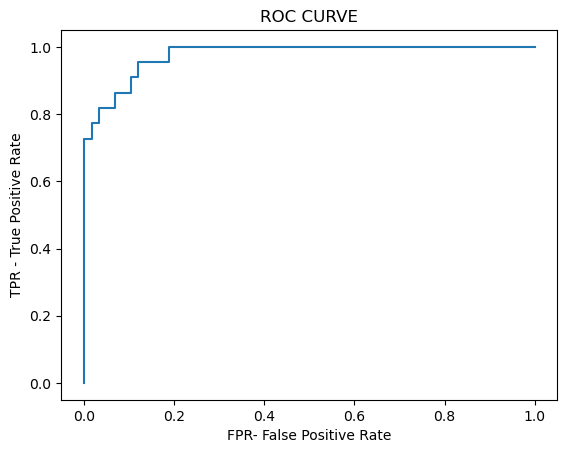

In [57]:
plt.plot(fpr,tpr)
plt.xlabel('FPR- False Positive Rate')
plt.ylabel('TPR - True Positive Rate')
plt.title("ROC CURVE")

# Classification report

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        58
           1       1.00      0.73      0.84        22

    accuracy                           0.93        80
   macro avg       0.95      0.86      0.90        80
weighted avg       0.93      0.93      0.92        80



# Conclusion :
- The model is performing good with accuracy of 0.93 .
- The classification reports are suggesting good measures, indicating that it is a good model . 